In [2]:
print("Netflix Stock Price Prediction")

Netflix Stock Price Prediction


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

import os

In [5]:
df = pd.read_csv("NFLX.csv")

In [7]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


In [9]:
df_copy = df.copy()

In [11]:
df.shape

(1009, 7)

In [12]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [13]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1009.0,4.190597e+02,1.085375e+02,2.339200e+02,3.314900e+02,3.777700e+02,5.091300e+02,6.923500e+02
High,1009.0,4.253207e+02,1.092630e+02,2.506500e+02,3.363000e+02,3.830100e+02,5.156300e+02,7.009900e+02
Low,1009.0,4.123740e+02,1.075559e+02,2.312300e+02,3.260000e+02,3.708800e+02,5.025300e+02,6.860900e+02
Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Adj Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Volume,1009.0,7.570685e+06,5.465535e+06,1.144000e+06,4.091900e+06,5.934500e+06,9.322400e+06,5.890430e+07


In [ ]:
train, test = train_test_split(df, test_size=0.2, )

In [17]:
test_pred = test.copy()

In [18]:
train.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
174,2018-10-12,339.570007,341.299988,328.899994,339.559998,339.559998,14870800
511,2020-02-18,379.299988,389.540009,379.190002,387.779999,387.779999,5173900
55,2018-04-25,306.369995,309.980011,292.619995,305.760010,305.760010,14919700
466,2019-12-11,294.489990,299.429993,294.200012,298.929993,298.929993,5589800
58,2018-04-30,311.070007,317.880005,310.119995,312.459991,312.459991,6088800
590,2020-06-10,436.000000,439.690002,430.549988,434.480011,434.480011,4896900
155,2018-09-17,364.220001,367.329987,349.570007,350.350006,350.350006,7071900
266,2019-02-27,363.500000,368.029999,359.799988,362.869995,362.869995,5629900
121,2018-07-30,351.929993,352.029999,334.019989,334.959991,334.959991,18260700
50,2018-04-18,336.299988,338.820007,331.100006,334.519989,334.519989,11221100


In [19]:
test.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
526,2020-03-10,356.429993,364.540009,347.850006,364.130005,364.130005,7604400
754,2021-02-03,550.169983,550.479980,538.239990,539.450012,539.450012,3172300
260,2019-02-19,355.799988,365.000000,355.320007,361.920013,361.920013,7396600
40,2018-04-04,273.630005,290.309998,271.220001,288.940002,288.940002,12914000
434,2019-10-25,270.679993,277.769989,270.179993,276.820007,276.820007,4747800
45,2018-04-11,302.880005,311.640015,301.820007,303.670013,303.670013,14877400
503,2020-02-05,375.130005,375.250000,362.299988,369.670013,369.670013,6437000
117,2018-07-24,366.940002,367.399994,354.559998,357.320007,357.320007,12851500
294,2019-04-08,365.109985,365.940002,359.929993,361.410004,361.410004,4653800
971,2021-12-13,612.000000,612.640015,599.520020,604.559998,604.559998,2517900


In [24]:
x_train = train[['Open', 'High', 'Low', 'Volume']].values
x_test = test[['Open', 'High', 'Low', 'Volume']].values

In [26]:
y_train = train['Close'].values
y_test = test['Close'].values

In [27]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [28]:
y_pred = lr.predict(x_test)

In [29]:
result = lr.predict([[262.000000, 267.567891, 250.123456, 11896100]])
print("Predicted Close Price: ", result[0])

Predicted Close Price:  257.21229595291896


In [32]:
print("MSE:", round(mean_squared_error(y_test, y_pred), 3))
print("RMSE:", round(np.sqrt(mean_squared_error(y_test, y_pred)), 3))
print("MAE:", round(mean_absolute_error(y_test, y_pred), 3))
print("MAPE:", round(mean_absolute_percentage_error(y_test, y_pred), 3))
print("R2 Score:", round(r2_score(y_test, y_pred), 3))

MSE: 15.918
RMSE: 3.99
MAE: 2.855
MAPE: 0.007
R2 Score: 0.999


In [44]:
def style():
    plt.figure(facecolor='black', figsize=(15, 10))
    ax = plt.axes()

    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')

    ax.spines['left'].set_color('white')
    ax.spines['bottom'].set_color('white')

    ax.set_facecolor('black')

In [34]:
df_copy['Date'] = pd.to_datetime(df_copy['Date'], format='%Y-%m-%d')

In [41]:
data = pd.DataFrame(df_copy[['Date', 'Close']])
data = data.reset_index()
data = data.drop(columns=['index'])
data.set_index('Date', inplace=True)

In [42]:
data

,Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001
...,...
2022-01-31,427.140015
2022-02-01,457.130005
2022-02-02,429.480011


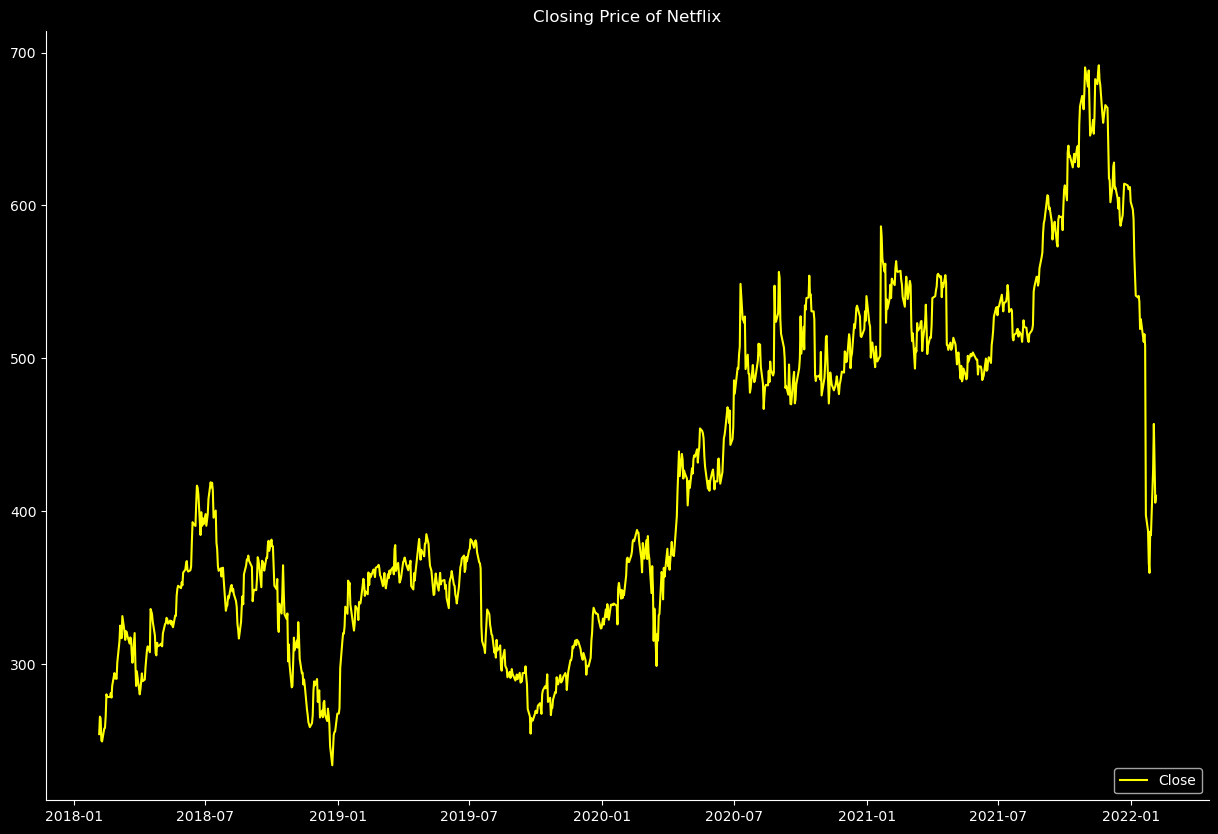

In [47]:
style()

plt.title("Closing Price of Netflix", color='white')
plt.plot(df_copy.Date, df_copy.Close, color = 'yellow')
plt.legend(['Close'], loc = 'lower right', facecolor='black', labelcolor='white')

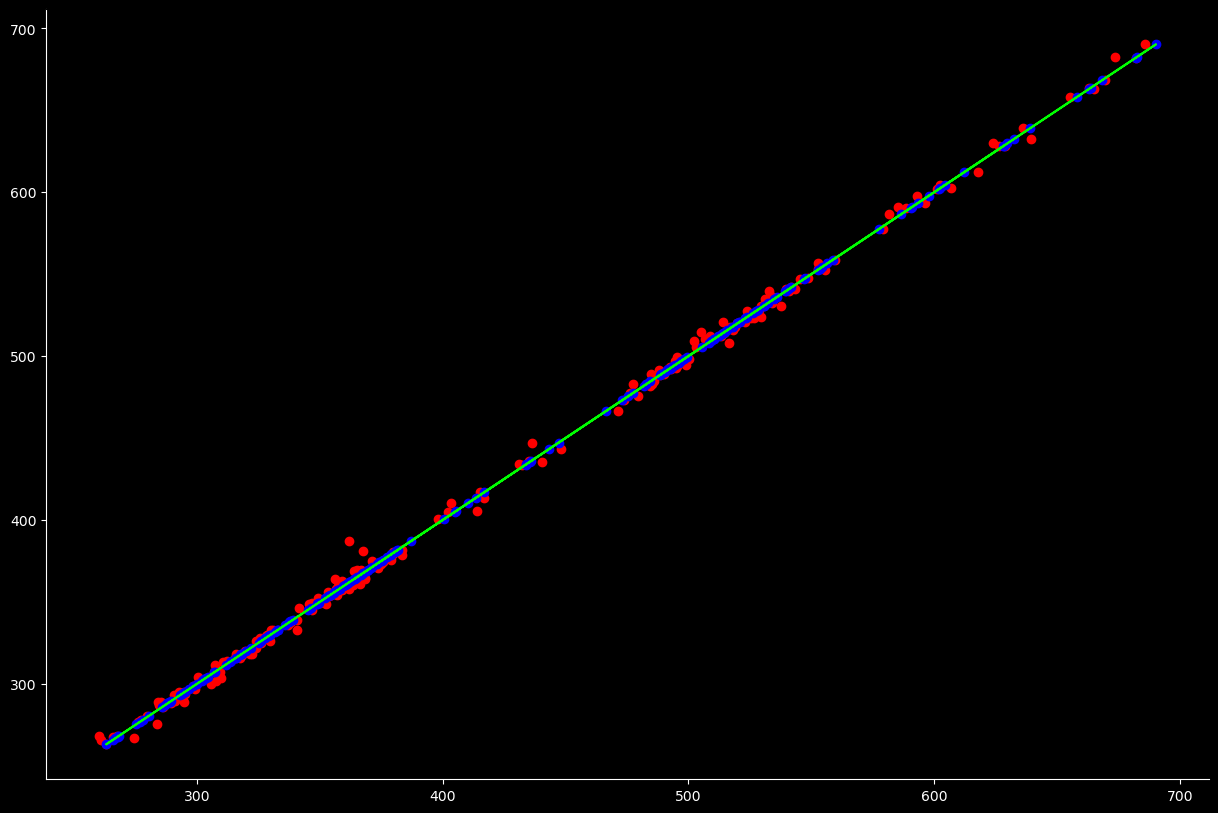

In [51]:
style()

plt.scatter(y_pred, y_test, color='red', marker='o')
plt.scatter(y_test, y_test, color='blue')
plt.plot(y_test, y_test, color='lime')

In [53]:
test_pred['Close_Prediction'] = y_pred
test_pred

,Date,Open,High,Low,Close,Adj Close,Volume,Close_Prediction
526,2020-03-10,356.429993,364.540009,347.850006,364.130005,364.130005,7604400,356.097459
754,2021-02-03,550.169983,550.479980,538.239990,539.450012,539.450012,3172300,540.748206
260,2019-02-19,355.799988,365.000000,355.320007,361.920013,361.920013,7396600,363.112304
40,2018-04-04,273.630005,290.309998,271.220001,288.940002,288.940002,12914000,285.514064
434,2019-10-25,270.679993,277.769989,270.179993,276.820007,276.820007,4747800,276.054405
...,...,...,...,...,...,...,...,...
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400,403.218301
111,2018-07-16,398.980011,403.359985,391.750000,400.480011,400.480011,22960000,398.214966
908,2021-09-14,584.890015,587.280029,575.559998,577.760010,577.760010,3457000,579.318281
28,2018-03-16,321.420013,324.109985,318.369995,318.450012,318.450012,7333700,321.494252


In [62]:
test_pred[['Close', 'Close_Prediction']].describe().T

,count,mean,std,min,25%,50%,75%,max
Close,202.0,425.332228,111.635545,263.079987,332.040008,379.884995,515.577484,690.309998
Close_Prediction,202.0,424.996527,111.448823,260.188453,330.004585,379.441529,516.141257,685.930393


In [63]:
test_pred['Date'] = pd.to_datetime(test_pred['Date'], format='%Y-%m-%d')

output = pd.DataFrame(test_pred[['Date', 'Close', 'Close_Prediction']])
output = output.reset_index()
output = output.drop(columns=['index'])
output.set_index('Date', inplace=True)
output = output.asfreq('D')
output

,Close,Close_Prediction
Date,,
2018-02-06,265.720001,261.091153
2018-02-07,NaN,NaN
2018-02-08,NaN,NaN
2018-02-09,NaN,NaN
2018-02-10,NaN,NaN
...,...,...
2022-01-31,NaN,NaN
2022-02-01,NaN,NaN
2022-02-02,NaN,NaN


In [64]:
output.to_csv('Close_Prediction.csv', index=True)
print("CSV Succesfully saved!")

CSV Succesfully saved!


In [ ]:
## ÖDEV
- Farklı Regresyon Modellerini kullanalım:
    - Ridge Regression
    - Lasso Regression
    - Polynomial Regression
    - Decision Tree Regressor
    - Support Vector Regressor
- Farklı Regresyon modellerinin sonuçlarını (metrics) karşılaştıralım. Tablo olsun. 